# **MLEnd Mini Project, Part 2**
# **1. Author**

**Student Name**:  Adam Toth <br>
**Student ID**:  210505924

# **2. Problem formulation**
This assignment uses the MLEnd Hums and Whistles dataset and attempts to build a machine learning pipeline that given 8 different songs in a dataset will form clusters based on previously extracted features. 
<br>



# **3. Machine Learning pipeline**
`Insert picture of all steps that are going to be implemented.`

# **4. Transformation stage**
`Describe any transformations, such as feature extraction. Identify input and output`.

### **`1. Feature extraction --> dimensionality reduction`**
### **`1. Feature extraction --> dimensionality reduction`**
  `Before the following steps are considered, let's define what goal is to be achieved. Some predictor features and a target feature are needed to be extracted from the created dataframe. In the first (basic) part of this paper, this four predictor features are going to be:`<br>
* `Power`
* `Pitch mean`
* `Pitch standard deviation`
* `Fraction of voiced region`,

`whilst the target variable will be "song" (either Potter or StarWars).`

By extracting four features from our audio signals, we are reducing the original data's dimensionality and establishing a subset of the original attributes (feature selection), on which we can perform various operations (feature extraction). Based on these predictor features a later defined models will decide whether the song is Potter or StarWars.` 

Two functions are defined at this stage that will extract the required features from our audio signals. 

**1.** 'getPitch': gets the pitch of an audio signal

**2.** 'getXy': takes a number of files and creates a NumPy array containing the four audio features used as predictors (X) and a binary label (y), that indicates whether the song is Potter (y=1) or StarWars (y=0). The resulting shapes of X and y arrays are then:
* The shape of X is:  (832, 4)
* The shape of y is:  (832,)

### **`2. Feature Scaling`**
Feature scaling needs to be applied to the extracted predictors as they could be at different levels of magnitude (e.g., different scale) causing algorithms sensitive to scaling, such as k-Means algorithm, to perform worse than otherwise and lead to incorrect model outcomes (e.g., if there are a few features that are dominant in magnitude, they would govern the model's results.  

This project will scale features using 'Standard Scaling' (Z-score normalisation), making features' properties to have a standard normal distribution with mean of 0 and standard deviation of 1. 


# **5. Modeling**
`Describe the Machine Learning models that you will implement.`

* __k-Means Clustering__<br>
K-Means Clustering is an unsupervisded machine learning algorithm, meaning it only takes input vectors without referring to labelled outcomes. 

"K-means starts by selecting _k_ random data points as the initial centroids. This initial solution is improved by two steps: assignment and update. In the _assignment step_, every point is put into the cluster whose centroid is closest. In the _update step_, the centroids are re-calculated by taking the mean of all data points assigned in each cluster. Together, these two steps constitute one iteration of k-means. These steps fine-tune both the cluster borders and the centroid location. The steps are iterated a fixed number of times (called iterations), or continued until no further improvement is obtained)" (Fränti & Sieranoja, 2018).

# **6. Methodology**
#### **Strategy to evaluate the performance** (designed before creating models)
### **`Quality metric`** (quantifying the performance)<br>
Contrary to the previously used KNN and SVM supervised ML models in Part 1 of this assignment, k-means clustering does not have a solid evaluation metric that could be applied to the results. 

How many clusters are formed could give an intuition whether the algorithm performed well. For this, domain knowledge is required, that is, knowing how many songs there are (7 in this case)
      
### **`On testing`**
Since there are will be no labels in this exercise (as k-Means algorithm is unsupervised), there is no training or test data split. Since the algorithm is not learning labels, it cannot overfit. 

# **7. Dataset**
The paper uses 350 given recordings of either hummings and whistlings of the most notable song parts of Harry Potter, Star Wars, Mamma Mia, Pink Panther, Lion King, Singing in the Rain, and The Greatest Show. 
<br>
## **Step 1**<br>
As a first step, files are downloaded from a given url and uploaded into my Google Drive. 

## **Step 2**<br>
Next, files are downloaded locally to correct files names that do not follow the instructed naming conventions. Once the corrected files are uploaded back to the Google Drive, sample paths of the respective folders are set here in Google Colab. Files are then imported as lists (seven of them). 

Each respective lists are then randomly sampled to reduce the final size of the generated dataframe and computation time later on. 

All seven lists are then used to create Pandas Dataframes by extracting each instance's 'file_id', 'participant' (id of recorder), 'interpretation' (type as of either humming or whistling), 'interpretation number', and 'song. Once this is done, the dataframes are merged together.

In [1]:
# Loading necessary libraries
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm

import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Public_Data/MLEndHW'
os.listdir(path)

['MLEndHW_Sample.zip',
 'Potter_1.zip',
 'Potter_2.zip',
 'StarWars_1.zip',
 'StarWars_2.zip',
 'Potter_1',
 'Potter_2',
 'StarWars_1',
 'StarWars_2',
 'Hakuna_1',
 'Mamma_1',
 'Rain_1',
 'Showman_1',
 'IMG_5050.jpg',
 'Panther_1']

In [14]:
import random

In [17]:
# Potter
sample_path = '/content/drive/MyDrive/Public_Data/MLEndHW/Potter_1/*.wav'
files1 = glob.glob(sample_path)
files1_random = random.choices(files1, k=50)

# StarWars
sample_path2 = '/content/drive/MyDrive/Public_Data/MLEndHW/StarWars_1/*.wav'
files2 = glob.glob(sample_path2)
files2_random = random.choices(files2, k=50)

# Hakuna
sample_path3 = '/content/drive/MyDrive/Public_Data/MLEndHW/Hakuna_1/*.wav'
files3 = glob.glob(sample_path3)
files3_random = random.choices(files3, k=50)


# Mamma Mia
sample_path4 = '/content/drive/MyDrive/Public_Data/MLEndHW/Mamma_1/*.wav'
files4 = glob.glob(sample_path4)
files4_random = random.choices(files4, k=50)


# Rain
sample_path5 = '/content/drive/MyDrive/Public_Data/MLEndHW/Rain_1/*.wav'
files5 = glob.glob(sample_path5)
files5_random = random.choices(files5, k=50)


# Showman
sample_path6 = '/content/drive/MyDrive/Public_Data/MLEndHW/Showman_1/*.wav'
files6 = glob.glob(sample_path6)
files6_random = random.choices(files6, k=50)


# Panther
sample_path7 = '/content/drive/MyDrive/Public_Data/MLEndHW/Panther_1/*.wav'
files7 = glob.glob(sample_path7)
files7_random = random.choices(files7, k=50)


In [18]:
MLENDHW_table = [] 
MLENDHW_table2 = [] 
MLENDHW_table3 = [] 
MLENDHW_table4 = [] 
MLENDHW_table5 = [] 
MLENDHW_table6 = [] 
MLENDHW_table7 = [] 

for file in files1_random:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

for file in files2_random:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table2.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

for file in files3_random:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table3.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

for file in files4_random:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table4.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

for file in files5_random:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table5.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

for file in files6_random:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table6.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

for file in files7_random:
  file_name = file.split('/')[-1]
  participant_ID = file.split('/')[-1].split('_')[0]
  interpretation_type = file.split('/')[-1].split('_')[1]
  interpretation_number = file.split('/')[-1].split('_')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  MLENDHW_table7.append([file_name,participant_ID,interpretation_type,interpretation_number, song])

MLENDHW_df = pd.DataFrame(MLENDHW_table,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df2 = pd.DataFrame(MLENDHW_table2,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df3 = pd.DataFrame(MLENDHW_table3,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df4 = pd.DataFrame(MLENDHW_table4,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df5 = pd.DataFrame(MLENDHW_table5,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df6 = pd.DataFrame(MLENDHW_table6,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 
MLENDHW_df7 = pd.DataFrame(MLENDHW_table7,columns=['file_id','participant','interpretation','number','song']).set_index('file_id') 

# Merging data from different folders and dataframes
files = files1_random + files2_random + files3_random + files4_random + files5_random + files6_random + files7_random

dataframes = [MLENDHW_df, MLENDHW_df2, MLENDHW_df3, MLENDHW_df4, MLENDHW_df5, MLENDHW_df6, MLENDHW_df7]
final_df2 = pd.concat(dataframes)
final_df2

,participant,interpretation,number,song
file_id,,,,
S114_hum_2_Potter.wav,S114,hum,Potter.wav,Potter
S49_hum_4_Potter.wav,S49,hum,Potter.wav,Potter
S39_whistle_2_Potter.wav,S39,whistle,Potter.wav,Potter
S101_hum_1_Potter.wav,S101,hum,Potter.wav,Potter
S54_whistle_2_Potter.wav,S54,whistle,Potter.wav,Potter
...,...,...,...,...
S5_hum_4_Panther.wav,S5,hum,Panther.wav,Panther
S84_hum_2_Panther.wav,S84,hum,Panther.wav,Panther
S89_whistle_1_Panther.wav,S89,whistle,Panther.wav,Panther


In [19]:
# Function gets the pitch of an audio signal
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [20]:
# Extracting four audio features as predictor variables (X) and a binary label (y)
def getX(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X =[]
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]
    #print(file_name)
    #print(labels_file.loc[fileID]['interpretation'])
    #print(labels_file.loc[fileID]['interpretation']=='hum')
    #yi = list(labels_file.loc[fileID]['interpretation'])[0]=='hum'
    #yi = labels_file.loc[fileID]['song']=='Potter'

    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    voiced_fr = np.mean(voiced_flag)

    xi = [power,pitch_mean,pitch_std,voiced_fr]
    X.append(xi)

  return np.array(X)

In [21]:
# Iterating through all instances in dataframe, deriving the 4 pre-specified predictor features (X)
# and target variable y (either Potter or StarWars)
X = getX(files, labels_file=final_df2, scale_audio=True, onlySingleDigit=True)

100%|██████████| 350/350 [21:19<00:00,  3.66s/it]


In [22]:
from numpy import asarray
from numpy import savetxt

# Save X to csv so I don't have to run it later
savetxt('X.csv', X, delimiter=',')

In [23]:
from numpy import genfromtxt
X = genfromtxt('X.csv', delimiter=',')

In [24]:
# Converting X into pandas dataframe for visualisation
dataset = pd.DataFrame({'Power': X[:, 0], 
                        'Pitch Mean': X[:, 1],
                        'Pitch s.d': X[:, 2], 
                        'Fract.of voiced region': X[:, 3],
                        'Song': final_df2['song']})

dataset.head()

,Power,Pitch Mean,Pitch s.d,Fract.of voiced region,Song
file_id,,,,,
S114_hum_2_Potter.wav,0.030767,184.604440,39.693705,0.713545,Potter
S49_hum_4_Potter.wav,0.031629,375.893517,43.269988,0.795563,Potter
S39_whistle_2_Potter.wav,0.020171,403.050520,35.063820,0.678764,Potter
S101_hum_1_Potter.wav,0.027797,289.233523,79.005025,0.771298,Potter
S54_whistle_2_Potter.wav,0.026879,389.805694,35.554751,0.552615,Potter


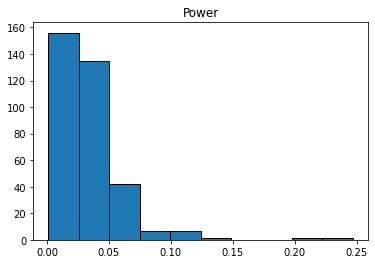

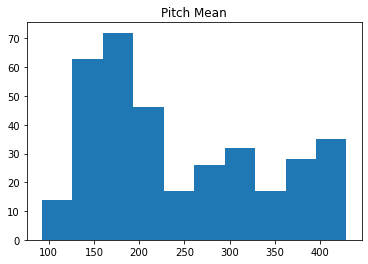

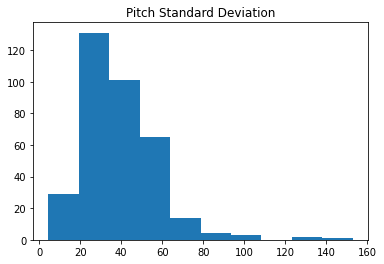

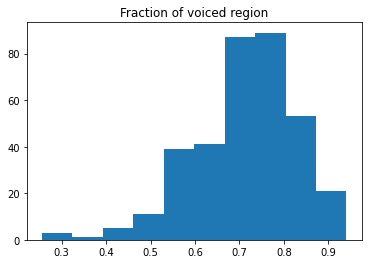

In [25]:
# Histograms
plt.hist(x=dataset.Power, edgecolor='black')
plt.title("Power")
plt.show()

plt.hist(x=dataset['Pitch Mean'])
plt.title("Pitch Mean")
plt.show()

plt.hist(x=dataset['Pitch s.d'])
plt.title("Pitch Standard Deviation")
plt.show()

plt.hist(x=dataset['Fract.of voiced region'])
plt.title("Fraction of voiced region")
plt.show()

In [64]:
from sklearn.utils.sparsefuncs import min_max_axis
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Scaling X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


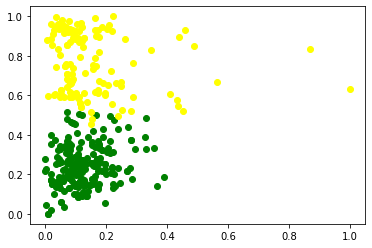

In [66]:
# Initial model with n_cluser=2
model_first=KMeans(n_clusters=2,random_state=0)
labels=model_first.fit_predict(X_scaled)

# Visualising
plt.scatter(X_scaled[labels==0,0],X_scaled[labels==0,1],c= "green", label="Cluster 1")
plt.scatter(X_scaled[labels==1,0],X_scaled[labels==1,1],c= "yellow",label="Cluster 2")

In [43]:
objective_function=[] 
for i in range(1,15):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(X_scaled)
    objective_function.append(clustering.inertia_)
# Inertia is calculaing min intra cluster distance
# Objective function contains min-intra cluster distances 
objective_function

[47.10513839260195,
 24.034464382667057,
 19.224914228756152,
 15.72863016264293,
 13.940863999777775,
 12.330002659415996,
 11.074179654029857,
 9.753863959129362,
 8.976389309583743,
 8.336032166764198,
 7.832491481463513,
 7.2978456772327025,
 6.953445108183722,
 6.6670065019552975]

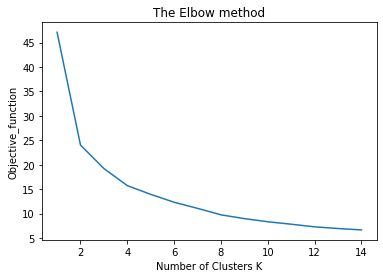

In [44]:
# Elbow method to find optimal number of clusters
# Elbow technique is plot between no of clusters and objective_function 
# we take k at a point where the objective function value have elbow shape 

plt.plot(range(1,15), objective_function)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters K")
plt.ylabel("Objective_function")
plt.show()

In [56]:
# Training the model with optimal no of clusters
tuned_clustering=KMeans(n_clusters=7,random_state=0)
labels=tuned_clustering.fit_predict(X_scaled)
print("Labels are: ", labels)
print()
# x and y  coordinates of all clusters
# Centroids of clusters
print("Centroids of clusters are: ", tuned_clustering.cluster_centers_[:])

Labels are:  [2 4 4 0 5 4 0 2 5 2 6 2 2 4 2 5 2 2 1 2 2 2 0 2 1 2 2 2 1 2 2 6 2 0 2 1 5
 1 4 2 2 2 5 0 2 2 2 5 3 2 6 2 4 4 2 0 2 6 2 0 2 2 2 4 2 0 1 4 1 4 6 2 1 4
 2 0 5 1 2 2 0 2 2 0 1 1 2 1 1 2 6 2 2 1 2 1 6 0 5 0 0 1 0 0 1 2 4 4 5 0 1
 4 2 0 1 2 2 2 0 3 1 1 0 1 1 5 2 1 0 2 1 1 1 0 0 0 0 4 1 0 2 1 3 2 2 4 0 2
 1 1 0 3 0 0 0 0 1 1 2 1 6 0 5 2 1 1 4 1 2 4 1 0 1 1 0 1 0 1 3 1 0 2 5 4 4
 2 1 5 5 4 2 1 1 2 1 3 1 0 1 1 4 2 1 2 4 1 2 1 2 0 1 0 0 2 1 4 2 3 1 6 0 0
 2 2 0 2 3 2 2 3 2 2 3 0 2 0 0 2 4 0 2 1 4 0 0 2 6 4 5 2 2 4 0 1 0 2 0 5 4
 5 2 2 0 4 2 6 2 0 6 1 1 1 0 0 1 2 2 1 1 1 1 0 4 0 1 0 4 2 1 2 0 1 1 0 4 0
 0 2 2 2 2 2 6 5 1 0 2 6 2 1 2 2 2 0 2 5 2 1 2 2 5 2 2 2 5 2 2 1 6 2 2 1 5
 2 1 5 2 1 0 5 2 0 0 5 5 0 2 5 6 2]

Centroids of clusters are:  [[0.1303041  0.62688697 0.31412592 0.70550889]
 [0.09764826 0.17547721 0.14289713 0.56302258]
 [0.14418971 0.26758754 0.22568182 0.80414124]
 [0.55547517 0.70644573 0.26195068 0.71424101]
 [0.112021   0.91105002 0.18240751 0.65985218]
 [0.09681184

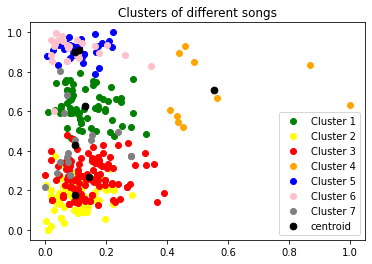

In [62]:
# visualizing the clusters
plt.scatter(X_scaled[labels==0,0],X_scaled[labels==0,1],c= "green", label="Cluster 1")
plt.scatter(X_scaled[labels==1,0],X_scaled[labels==1,1],c= "yellow",label="Cluster 2")
plt.scatter(X_scaled[labels==2,0],X_scaled[labels==2,1],c="red",label="Cluster 3")
plt.scatter(X_scaled[labels==3,0],X_scaled[labels==3,1],c="orange",label="Cluster 4")
plt.scatter(X_scaled[labels==4,0],X_scaled[labels==4,1],c="blue",label="Cluster 5")
plt.scatter(X_scaled[labels==5,0],X_scaled[labels==5,1],c="pink",label="Cluster 6")
plt.scatter(X_scaled[labels==6,0],X_scaled[labels==6,1],c="grey",label="Cluster 7")


plt.scatter(tuned_clustering.cluster_centers_[:,0],tuned_clustering.cluster_centers_[:,1],s=45,c="black",label="centroid")
plt.title("Clusters of different songs")

plt.legend()
plt.show()

Although I went with 7 clusters in my final model, the Elbow method actually suggested 4. 